# Classification: Performance of the Naive Bayes algorithm on the given data set
Run theNaive Bayes tool on the resulting version of **`train_gr_smpl`**. To be able to do this in Weka, you may
need to apply several Weka “Filters”. Explain the reason for choosing and using these filters. Once
you can run the algorithm, record, compare and analyse the classifier’s accuracy on different classes
(as given by the confusion matrix).

### Proportional k-interval discretization
 According to the course textbook Equal Frequency binning is excellent for Naive bayes.
 
 **Specifically when the number of bins is equal to the sqaure root of the number of instances.** This is called Proportional k-interval discretization

* Preprocess (filter the data) data
    * normalize the data filter
    * Scipy / Keras maybe
    * Justify how / why 
* 

In [91]:
import helperfn

test = helperfn.get_random_data('x_train_gr_smpl.csv')
test

(          0      1      2      3      4      5      6      7      8      9  \
 239   255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
 3715  246.0  242.0  246.0  244.0  246.0  248.0  249.0  248.0  248.0  248.0   
 5631   19.0   23.0   27.0   26.0   24.0   22.0   22.0   26.0   25.0   24.0   
 5059  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
 5498   24.0   24.0   24.0   24.0   24.0   25.0   25.0   26.0   27.0   26.0   
 ...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
 6942   14.0   14.0   14.0   13.0   13.0   12.0   11.0   11.0   11.0   10.0   
 9509  171.0  212.0  121.0  178.0  253.0  255.0  255.0  255.0  255.0  255.0   
 9582   33.0   34.0   35.0   36.0   36.0   34.0   32.0   31.0   33.0   34.0   
 7332   36.0   39.0   38.0   34.0   32.0   32.0   33.0   34.0   33.0   32.0   
 329    61.0   60.0   60.0   60.0   59.0   61.0   61.0   64.0   69.0   73.0   
 
       ...   2294   2295   2296   2297   2298   22

In [92]:
test.dtypes
data = test.to_numpy()
data[0]

AttributeError: 'tuple' object has no attribute 'dtypes'

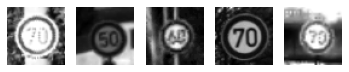

In [24]:
import matplotlib.pyplot as plt

num_images = 5

for i in range(num_images):
    row = data[i]
    image = row.reshape(48,48)
    plt.subplot(1, num_images, i+1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [29]:
from Scripts.NaiveBayse import SamNaiveBayseGaussian
%load_ext autoreload
%autoreload 2

from Scripts import helperfn

import numpy as np

#classifiers, scores, train_test_data = NaiveBayseBernoulli.build_nbc_models()
#confusionMatrixArr = NaiveBayseBernoulli.build_confusion_matrix(classifiers, train_test_data)
#NaiveBayseBernoulli.show_confusion_matrix(confusionMatrixArr)


# classifiers, scores, train_test_data = SamNaiveBayseGaussian.build_nbg_models(balance_classes = False)
# arr = SamNaiveBayseGaussian.build_confusion_matrix(classifiers, train_test_data)
# SamNaiveBayseGaussian.show_confusion_matrix(arr)



X , y = helperfn.get_data(2)

arr = np.array([1,2,3])



x = np.take(X,arr, axis=0)

print(x)

SamNaiveBayseGaussian.rskSplit()









The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
      0     1     2     3     4      5      6      7      8      9  ...  \
1  73.0  75.0  79.0  78.0  76.0   75.0   89.0  107.0  133.0  125.0  ...   
2  72.0  75.0  79.0  77.0  81.0   89.0  105.0  109.0   86.0   90.0  ...   
3  67.0  70.0  74.0  80.0  93.0  107.0  110.0   96.0   69.0  100.0  ...   

    2294  2295  2296  2297  2298  2299  2300   2301   2302   2303  
1   96.0  93.0  85.0  77.0  69.0  73.0  83.0  100.0  101.0  101.0  
2   98.0  95.0  88.0  80.0  73.0  71.0  74.0   80.0   89.0   95.0  
3  112.0  92.0  87.0  82.0  77.0  72.0  70.0   72.0   81.0   88.0  

[3 rows x 2304 columns]


In [13]:
import NaiveBayseBernoulli


true , false = NaiveBayseBernoulli.countRates(2)
print("True: ", true)
print("False: ", false)

True:  2250
False: 7440
